In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [3]:
# 데이터셋 다운로드
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
!wget -P /content/ $_URL
!unzip -q cats_and_dogs_filtered.zip -d .

--2025-02-15 03:46:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.5MB/s    in 4.0s    

2025-02-15 03:47:01 (16.3 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# train & validation 이미지 저장 경로 변수 저장
path = '/content/cats_and_dogs_filtered/'
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [5]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs
/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [8]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [10]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

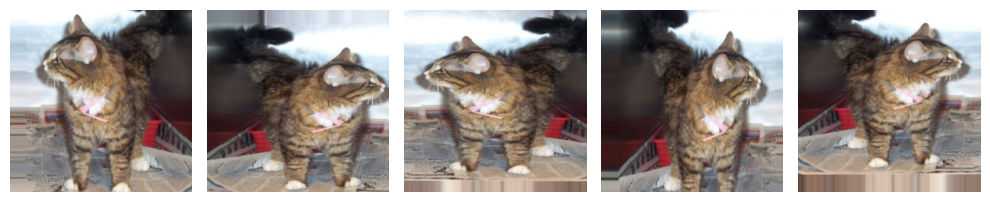

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [14]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


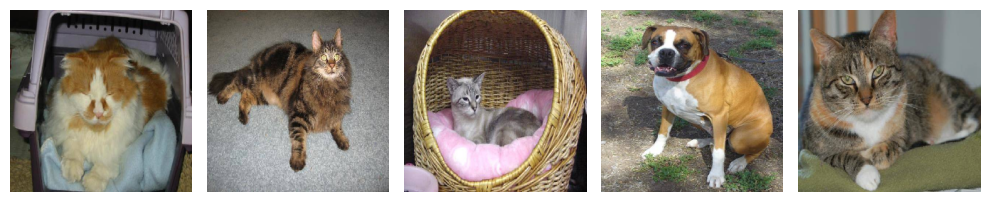

In [15]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [16]:
_[:5] # 정답 데이터

array([0., 0., 0., 1., 0.], dtype=float32)

In [42]:
# 문제 1-2. hyperparameter 설정

batch_size = 16
epochs = 20
IMG_HEIGHT = 512
IMG_WIDTH = 512

In [43]:
# 문제 1-2. 데이터 generator 생성
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=5,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [44]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [45]:
train_data_gen[0][0].shape

(16, 512, 512, 3)

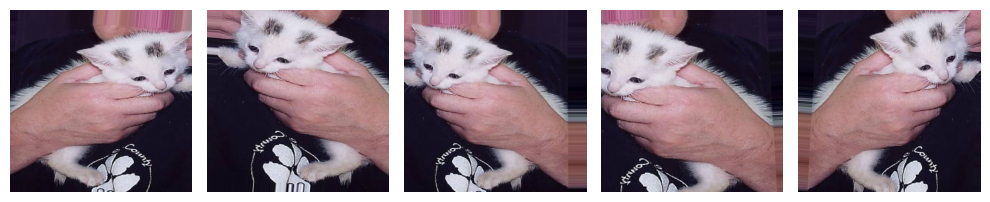

In [46]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [47]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [48]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [49]:
# 문제 1-2. 모델 구현
# 출력 차원을 줄였음
# 층 개수를 늘려보았음
# skip connection과 드롭아웃을 적용해보았음
input_layer = tf.keras.layers.Input(shape=(512, 512, 3))

# 1
x = tf.keras.layers.Conv2D(16, (3, 3), strides=1, padding='same', activation='relu')(input_layer)
x = tf.keras.layers.Conv2D(16, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 2
shortcut = x
x = tf.keras.layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
shortcut = tf.keras.layers.Conv2D(32, (1, 1), strides=1, padding='same')(shortcut)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 3
shortcut = x
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
shortcut = tf.keras.layers.Conv2D(64, (1, 1), strides=1, padding='same')(shortcut)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 4
shortcut = x
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
shortcut = tf.keras.layers.Conv2D(128, (1, 1), strides=1, padding='same')(shortcut)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# 5
shortcut = x
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
shortcut = tf.keras.layers.Conv2D(128, (1, 1), strides=1, padding='same')(shortcut)
x = tf.keras.layers.Add()([x, shortcut])
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)


# Dense Layer에 드롭아웃 적용
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)

out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 512, 512, 16)   │            448 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 512, 512, 16)   │          2,320 │ conv2d_47[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 512, 512, 16)   │             64 │ conv2d_48[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 256, 256, 16)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_49 (Conv2D)        │ (None, 256, 256, 32)   │          4,640 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_50 (Conv2D)        │ (None, 256, 256, 32)   │          9,248 │ conv2d_49[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 256, 256, 32)   │            128 │ conv2d_50[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 256, 256, 32)   │            544 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 256, 256, 32)   │              0 │ batch_normalization_1… │
│                           │                        │                │ conv2d_51[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_11             │ (None, 256, 256, 32)   │              0 │ add_11[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 128, 128, 32)   │              0 │ activation_11[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_52 (Conv2D)        │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_52[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_53[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 128, 128, 64)   │            256 │ conv2d_54[0][0]        │
│ (BatchNormalization) 

 Total params: 17,859,057 (68.13 MB)

 Trainable params: 17,858,321 (68.12 MB)

 Non-trainable params: 736 (2.88 KB)

In [50]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
# 학습률 조정
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [51]:
# 모델 학습
history = model.fit(
    train_data_gen,
    steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
    epochs=epochs,
    validation_data=val_data_gen,
    # callbacks=callbacks_list,
    validation_freq=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_118']
Received: inputs=Tensor(shape=(None, 512, 512, 3))
  warnings.warn(msg)


125/125 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - binary_accuracy: 0.5367 - loss: 2.0424 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - binary_accuracy: 0.5832 - loss: 0.7780 - val_binary_accuracy: 0.5010 - val_loss: 0.6933
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - binary_accuracy: 0.5976 - loss: 0.7003 - val_binary_accuracy: 0.5160 - val_loss: 0.6930
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - binary_accuracy: 0.6309 - loss: 0.6434 - val_binary_accuracy: 0.6380 - val_loss: 0.6704
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - binary_accuracy: 0.6384 - loss: 0.6316 - val_binary_accuracy: 0.6790 - val_loss: 0.6191
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - binary_accuracy: 0.6581 - loss: 0.6335 - val_binary_accuracy: 0.6850 - val_loss: 0.5958
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - binary_accuracy: 0.6991 - loss: 0.5706 - val_binary_accuracy: 0.7000 - val_loss: 0.5683
Epoch 8/20

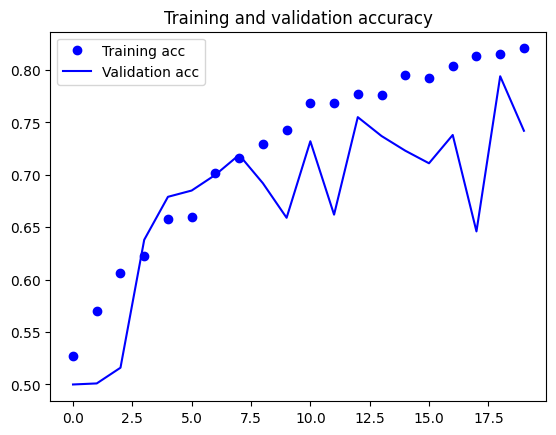

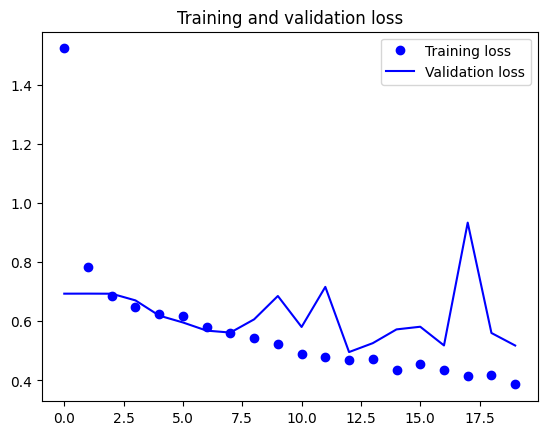

In [52]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 수정 내역
스킵 커넥션과 드롭아웃 0.3을 적용하니 정확도가 0.6 선까지는 오르는 양상을 확인하였음   
에포크를 7에서 15로 늘렸더니 0.7 선까지 증가하였음   
Adam 학습률을 더 낮추고 batch_size를 16으로 조정해보았음   
에포크를 20까지 조정해보았음   
정확도 그래프의 두 지표가 에포크가 끝날 때 까지 우상향 하는 모습을 확인하였음   
학습률을 0.0001에서 0.00025로 증가시켰더니 학습이 불안정하였음   
학습률을 다시 낮추고 이번에는 층을 더 추가시켜보았음   
데이터셋 개수가 부족하기 때문에 검증 이미지를 생성하는 파라미터를 조절하여 일반화 성능을 높여보는 시도가 있었음  
rotation range를 20으로 증가시켜보았음   
출력이미지의 예시를 확인한 결과 이미지가 과하게 왜곡되어 10으로도 낮춰보고 5까지 낮추었음   
시도를 거듭해보아도 검증 데이터셋이 불안정하다고 생각되었음(그래프가 요동침)   
input값을 원본 해상도와 동일하게 변경하고 다시 시도해보았음   
입력 크기를 증가시킨 결과 0.8 이상의 훈련 정확도를 확인하였음
